In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

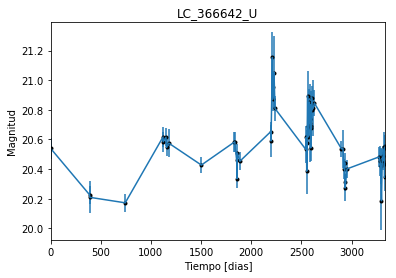

In [2]:
data = np.genfromtxt('LC_366642_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_366642_U')
plt.savefig("LC_366642_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

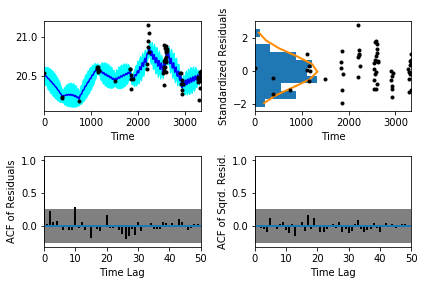

In [5]:
sample.assess_fit()

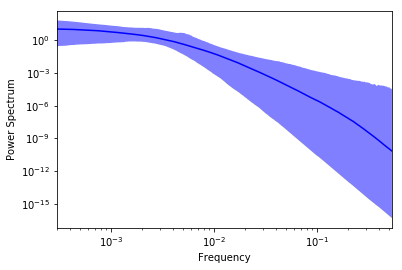

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

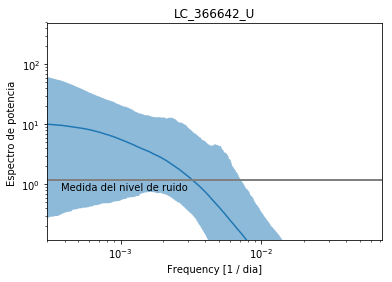

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_366642_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_366642_U')

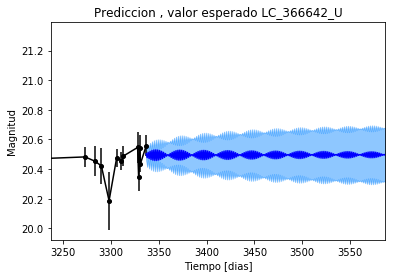

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_366642_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_366642_U')

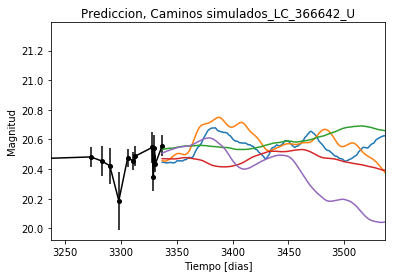

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_366642_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


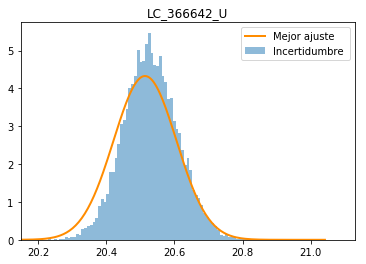

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_366642_U')
plt.savefig("Mejor_ajuste_LC_366642_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_366642_U')

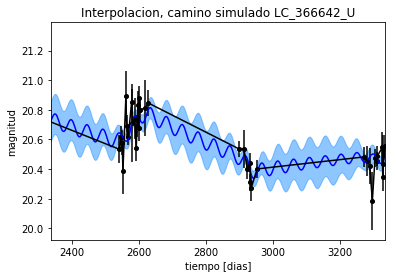

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_U')

Text(0.5,1,'Interpolacion, camino simulado LC_366642_U')

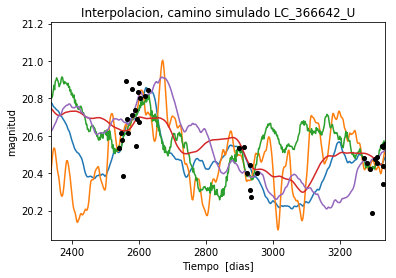

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 378.703991223
Median: 0.0091106646235
Standard deviation: 0.183796077036
68% credibility interval: [ 0.00096576  0.13887495]
95% credibility interval: [  3.79685993e-04   7.32965300e-01]
99% credibility interval: [  3.17268594e-04   9.80697571e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 444.177885328
Median: 0.00354507104301
Standard deviation: 0.0911002942457
68% credibility interval: [ 0.00075331  0.0345335 ]
95% credibility interval: [ 0.00035403  0.29042391]
99% credibility interval: [  3.11863616e-04   6.93244083e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 627.965766433
Median: 0.0238819428336
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1726.87954767
Median: 67.5957562621
Standard deviation: 1.5000051186
68% credibility interval: [ 65.90084225  68.65687476]
95% credibility interval: [ 63.53293059  69.24408133]
99% credibility interval: [ 61.6897444  69.4395251]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 281.660279963
Median: 0.607668559247
Standard deviation: 2.16203911536
68% credibility interval: [ 0.06731887  3.4680528 ]
95% credibility interval: [ 0.01742947  7.60931212]
99% credibility interval: [  0.01139744  10.86691141]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1401.20737586
Median: 0.683897270303
Standard deviation: 10.1704449967
68% credibility interval: [  0.02762734  11.54832767]
95% credibility interval: [  1.4056987

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 778.295209975
Median: 3.70446193793e-20
Standard deviation: 1.61637930237e+32
68% credibility interval: [  5.56221870e-38   4.79571994e-04]
95% credibility interval: [  7.25140004e-81   3.00695190e+07]
99% credibility interval: [  6.00021851e-105   1.08445393e+031]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2788.38602714
Median: 20.5041498425
Standard deviation: 0.0835477827899
68% credibility interval: [ 20.42549943  20.57469651]
95% credibility interval: [ 20.33046209  20.66376782]
99% credibility interval: [ 20.24366658  20.7561671 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 546.556379174
Median: 0.030710989447
Standard deviation: 0.27275949665
68% credibility interval: [ 0.          0.47656579]
95% credibility interval: [ 0.          0.94008083]
99% credibility interval: [ 0.          1.03388453]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 546.556379174
Median: 0.030710989447
Standard deviation: 0.27275949665
68% credibility interval: [ 0.          0.47656579]
95% credibility interval: [ 0.          0.94008083]
99% credibility interval: [ 0.          1.03388453]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 403.573535764
Median: 0.0
Standard deviation: 0.00133007455667
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1726.87954767
Median: 67.5957562621
Standard deviation: 1.5000051186
68% credibility interval: [ 65.90084225  68.65687476]
95% credibility interval: [ 63.53293059  69.24408133]
99% credibility interval: [ 61.6897444  69.4395251]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3945.46221001
Median: 0.0420169433011
Standard deviation: 0.033024776279
68% credibility interval: [ 0.02618216  0.07192663]
95% credibility interval: [ 0.01760268  0.12977891]
99% credibility interval: [ 0.01419176  0.19851945]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2857.30022023
Median: 1.04374618299
Standard deviation: 0.162103606431
68% credibility interval: [ 0.90017947  1.2144949 ]
95% credibility interval: [ 0.77780544  1.41426092]
99% credibility interval: [ 0.70513388  1.56049401]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 850.783776953
Median: 0.000846385707196
Standard deviation: 0.275068965601
68% credibility interval: [  1.24057963e-05   2.43082162e-02]
95% credibility interval: [  6.05275782e-12   5.12567746e-01]
99% credibility interval: [  3.29252865e-36   2.16101294e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 378.703991223
Median: (-0.057243994101-0.395569483384j)
Standard deviation: 2.06657337421
68% credibility interval: [-0.87257705-4.59807536j -0.00606802-0.01766819j]
95% credibility interval: [ -4.60535681e+00+0.j          -2.38563745e-03-0.03068351j]
99% credibility interval: [ -6.16190457e+00+0.j          -1.99345737e-03-1.04278729j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 444.177885328
Median: (-0.0222743382904+0.662042302561j)
Standard deviation: 1.80686107993
68% credibility interval: [-0.21698041+0.77519864j -0.00473318+0.j        ]
95% credibility interval: [-1.82478725+3.78508527j -0.00222441+0.01839975j]
99% credibility interval: [ -4.35578104e+00+2.13055894j  -1.95949689e-03+0.j        ]
Posterior sum